<a href="https://colab.research.google.com/github/monoramasn/Speech_fairness/blob/main/finetune_whisper_gender_wise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q git+https://github.com/huggingface/peft.git@main
!pip install -U accelerate
!pip install evaluate
!pip install jiwer
!pip install --upgrade transformers bitsandbytes datasets torch torchvision torchaudio

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.1/290.1 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 72.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 63.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 92.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [2]:
from datasets import load_dataset, DatasetDict
language="slovenian"
voxpopuli = DatasetDict()

voxpopuli["train"] = load_dataset("facebook/voxpopuli", "sl", split=['train'])[0]
voxpopuli["test"] = load_dataset("facebook/voxpopuli", "sl", split=['test'])[0]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/datasets/load.py:1461: FutureWarning: The repository for facebook/voxpopuli contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/facebook/voxpopuli
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  wa

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

/usr/local/lib/python3.10/dist-packages/datasets/load.py:1461: FutureWarning: The repository for facebook/voxpopuli contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/facebook/voxpopuli
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


In [3]:
# Sampling

#voxpopuli["train"] = voxpopuli["train"].select(range(800))
#voxpopuli["test"] = voxpopuli["test"].select(range(300))

voxpopuli_data = voxpopuli.remove_columns(['audio_id', 'language', 'raw_text', 'speaker_id', 'is_gold_transcript', 'accent'])

In [4]:
voxpopuli_data

DatasetDict({
    train: Dataset({
        features: ['audio', 'normalized_text', 'gender'],
        num_rows: 2099
    })
    test: Dataset({
        features: ['audio', 'normalized_text', 'gender'],
        num_rows: 309
    })
})

In [5]:
from transformers import WhisperFeatureExtractor

model_name_or_path = "openai/whisper-base"
task = "transcribe"

feature_extractor = WhisperFeatureExtractor.from_pretrained(model_name_or_path)

preprocessor_config.json:   0%|          | 0.00/185k [00:00<?, ?B/s]

In [6]:
from transformers import WhisperTokenizer
from transformers import WhisperProcessor

tokenizer = WhisperTokenizer.from_pretrained(model_name_or_path, language=language, task=task)
processor = WhisperProcessor.from_pretrained(model_name_or_path, language=language, task=task)

tokenizer_config.json:   0%|          | 0.00/283k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/836k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.48M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.19k [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [7]:
from transformers import (
    WhisperFeatureExtractor,
    WhisperForConditionalGeneration,
    WhisperProcessor,
    TrainingArguments,
    Trainer
)
model = WhisperForConditionalGeneration.from_pretrained(model_name_or_path)

config.json:   0%|          | 0.00/1.98k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/290M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.81k [00:00<?, ?B/s]

In [8]:
max_label_length = model.config.max_length
min_input_length = 0.0
max_input_length = 30.0

In [9]:
def prepare_dataset(batch):
    audio = batch["audio"]
    batch["input_features"] = feature_extractor(audio["array"], sampling_rate=audio["sampling_rate"]).input_features[0]
    batch["labels"] = tokenizer(batch["normalized_text"]).input_ids
    return batch

def prepare_dataset_with_gender(batch):
    audio = batch["audio"]
    input_features = feature_extractor(audio["array"], sampling_rate=audio["sampling_rate"]).input_features[0]
    labels = tokenizer(batch["normalized_text"]).input_ids
    gender = batch["gender"]
    return {"input_features": input_features, "labels": labels, "gender": gender}

In [10]:
#voxpopuli_sl = voxpopuli.map(prepare_dataset, remove_columns=voxpopuli.column_names["train"], num_proc=2)

voxpopuli_with_gender = voxpopuli_data.map(prepare_dataset_with_gender, remove_columns=voxpopuli_data.column_names["train"], batch_size=2)

# Create separate datasets for each gender
voxpopuli_male = voxpopuli_with_gender.filter(lambda example: example["gender"] == "male")
voxpopuli_female = voxpopuli_with_gender.filter(lambda example: example["gender"] == "female")

Map:   0%|          | 0/2099 [00:00<?, ? examples/s]

Map:   0%|          | 0/309 [00:00<?, ? examples/s]

Filter:   0%|          | 0/2099 [00:00<?, ? examples/s]

Filter:   0%|          | 0/309 [00:00<?, ? examples/s]

Filter:   0%|          | 0/2099 [00:00<?, ? examples/s]

Filter:   0%|          | 0/309 [00:00<?, ? examples/s]

In [11]:
voxpopuli_female

DatasetDict({
    train: Dataset({
        features: ['gender', 'input_features', 'labels'],
        num_rows: 786
    })
    test: Dataset({
        features: ['gender', 'input_features', 'labels'],
        num_rows: 112
    })
})

In [12]:
voxpopuli_with_gender

DatasetDict({
    train: Dataset({
        features: ['gender', 'input_features', 'labels'],
        num_rows: 2099
    })
    test: Dataset({
        features: ['gender', 'input_features', 'labels'],
        num_rows: 309
    })
})

In [13]:
import torch

from dataclasses import dataclass
from typing import Any, Dict, List, Union

@dataclass
class DataCollatorSpeechSeq2SeqWithPadding:
    processor: Any

    def __call__(self, features: List[Dict[str, Union[List[int], torch.Tensor]]]) -> Dict[str, torch.Tensor]:
        input_features = [{"input_features": feature["input_features"]} for feature in features]
        batch = self.processor.feature_extractor.pad(input_features, return_tensors="pt")

        label_features = [{"input_ids": feature["labels"]} for feature in features]
        labels_batch = self.processor.tokenizer.pad(label_features, return_tensors="pt")

        labels = labels_batch["input_ids"].masked_fill(labels_batch.attention_mask.ne(1), -100)

        if (labels[:, 0] == self.processor.tokenizer.bos_token_id).all().cpu().item():
            labels = labels[:, 1:]

        batch["labels"] = labels

        return batch

In [14]:
data_collator = DataCollatorSpeechSeq2SeqWithPadding(processor=processor)

In [15]:
import evaluate

metric = evaluate.load("wer")

In [16]:
model_checkpoint_name = model_name_or_path.split("/")[-1]
repo_name = f"{model_checkpoint_name}-demo-colab"

In [17]:
from transformers import TrainerCallback
import matplotlib.pyplot as plt

class LoggingCallback(TrainerCallback):
    def __init__(self):
        self.train_losses = []
        self.eval_losses = []

    def on_log(self, args, state, control, logs=None, **kwargs):
        if logs is not None:
            if 'loss' in logs:  # Training loss
                self.train_losses.append(logs['loss'])
            elif 'eval_loss' in logs:  # Evaluation loss
                self.eval_losses.append(logs['eval_loss'])

In [18]:
# Create separate callback instances for each trainer
logging_callback_male = LoggingCallback()
logging_callback_female = LoggingCallback()
logging_callback_combine = LoggingCallback()

In [19]:
from transformers import Seq2SeqTrainingArguments

# Define training arguments
training_args = Seq2SeqTrainingArguments(
    output_dir="repo_name",
    per_device_train_batch_size=8,
    gradient_accumulation_steps=1,
    learning_rate=1e-3,
    warmup_steps=50,
    num_train_epochs=10,
    evaluation_strategy="epoch",
    fp16=True,
    per_device_eval_batch_size=8,
    generation_max_length=128,
    logging_steps=100,
    remove_unused_columns=False,
    label_names=["labels"],
)

In [20]:
from transformers import Seq2SeqTrainer

# Define trainers for each gender
trainer_male = Seq2SeqTrainer(
    args=training_args,
    model=model,
    train_dataset=voxpopuli_male["train"],
    eval_dataset=voxpopuli_male["test"],
    data_collator=data_collator,
    tokenizer=processor.feature_extractor,
    callbacks=[logging_callback_male],
)

trainer_female = Seq2SeqTrainer(
    args=training_args,
    model=model,
    train_dataset=voxpopuli_female["train"],
    eval_dataset=voxpopuli_female["test"],
    data_collator=data_collator,
    tokenizer=processor.feature_extractor,
    callbacks=[logging_callback_female],
)

trainer_combine = Seq2SeqTrainer(
    args=training_args,
    model=model,
    train_dataset=voxpopuli_with_gender["train"],
    eval_dataset=voxpopuli_with_gender["test"],
    data_collator=data_collator,
    tokenizer=processor.feature_extractor,
    callbacks=[logging_callback_combine],
)

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


In [21]:
# Train the models for each gender
trainer_male.train()
trainer_female.train()

Epoch,Training Loss,Validation Loss
1,2.534300,2.859570
2,2.016300,2.265041
3,1.479400,1.998531
4,0.902300,1.974939
5,0.644400,1.842131
6,0.496300,1.891016
7,0.271400,1.940049
8,0.145100,2.060446
9,0.079200,2.206057
10,0.020300,2.189229


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 448, 'suppress_tokens': [1, 2, 7, 8, 9, 10, 14, 25, 26, 27, 28, 29, 31, 58, 59, 60, 61, 62, 63, 90, 91, 92, 93, 359, 503, 522, 542, 873, 893, 902, 918, 922, 931, 1350, 1853, 1982, 2460, 2627, 3246, 3253, 3268, 3536, 3846, 3961, 4183, 4667, 6585, 6647, 7273, 9061, 9383, 10428, 10929, 11938, 12033, 12331, 12562, 13793, 14157, 14635, 15265, 15618, 16553, 16604, 18362, 18956, 20075, 21675, 22520, 26130, 26161, 26435, 28279, 29464, 31650, 32302, 32470, 36865, 42863, 47425, 49870, 50254, 50258, 50358, 50359, 50360, 50361, 50362], 'begin_suppress_tokens': [220, 50257]}
Some non-default generation parameters are set in the model config. These should go into a G

Epoch,Training Loss,Validation Loss
1,No log,1.707347
2,1.491300,1.705944
3,0.990800,1.742015
4,0.712600,1.719867
5,0.473600,1.894552
6,0.309400,2.067500
7,0.191900,2.021240
8,0.116200,1.953070
9,0.066800,1.953962
10,0.026300,1.960802


Checkpoint destination directory repo_name/checkpoint-500 already exists and is non-empty. Saving will proceed but saved results may be invalid.
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 448, 'suppress_tokens': [1, 2, 7, 8, 9, 10, 14, 25, 26, 27, 28, 29, 31, 58, 59, 60, 61, 62, 63, 90, 91, 92, 93, 359, 503, 522, 542, 873, 893, 902, 918, 922, 931, 1350, 1853, 1982, 2460, 2627, 3246, 3253, 3268, 3536, 3846, 3961, 4183, 4667, 6585, 6647, 7273, 9061, 9383, 10428, 10929, 11938, 12033, 12331, 12562, 13793, 14157, 14635, 15265, 15618, 16553, 16604, 18362, 18956, 20075, 21675, 22520, 26130, 26161, 26435, 28279, 29464, 31650, 32302, 32470, 36865, 42863, 47425, 49870, 50254, 50258, 50358, 50359, 50360, 5

TrainOutput(global_step=990, training_loss=0.44318255312515026, metrics={'train_runtime': 1073.7017, 'train_samples_per_second': 7.32, 'train_steps_per_second': 0.922, 'total_flos': 5.097995698176e+17, 'train_loss': 0.44318255312515026, 'epoch': 10.0})

In [22]:
trainer_combine.train()

Epoch,Training Loss,Validation Loss
1,1.007700,1.854045
2,0.752600,1.760329
3,0.584000,1.680966
4,0.380700,1.759829
5,0.276500,1.804545
6,0.171700,1.892086
7,0.099900,1.926010
8,0.043200,1.970936
9,0.015500,2.023593
10,0.002900,2.060795


Checkpoint destination directory repo_name/checkpoint-500 already exists and is non-empty. Saving will proceed but saved results may be invalid.
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 448, 'suppress_tokens': [1, 2, 7, 8, 9, 10, 14, 25, 26, 27, 28, 29, 31, 58, 59, 60, 61, 62, 63, 90, 91, 92, 93, 359, 503, 522, 542, 873, 893, 902, 918, 922, 931, 1350, 1853, 1982, 2460, 2627, 3246, 3253, 3268, 3536, 3846, 3961, 4183, 4667, 6585, 6647, 7273, 9061, 9383, 10428, 10929, 11938, 12033, 12331, 12562, 13793, 14157, 14635, 15265, 15618, 16553, 16604, 18362, 18956, 20075, 21675, 22520, 26130, 26161, 26435, 28279, 29464, 31650, 32302, 32470, 36865, 42863, 47425, 49870, 50254, 50258, 50358, 50359, 50360, 5

TrainOutput(global_step=2630, training_loss=0.3248500646350502, metrics={'train_runtime': 2910.4096, 'train_samples_per_second': 7.212, 'train_steps_per_second': 0.904, 'total_flos': 1.3614113193984e+18, 'train_loss': 0.3248500646350502, 'epoch': 10.0})

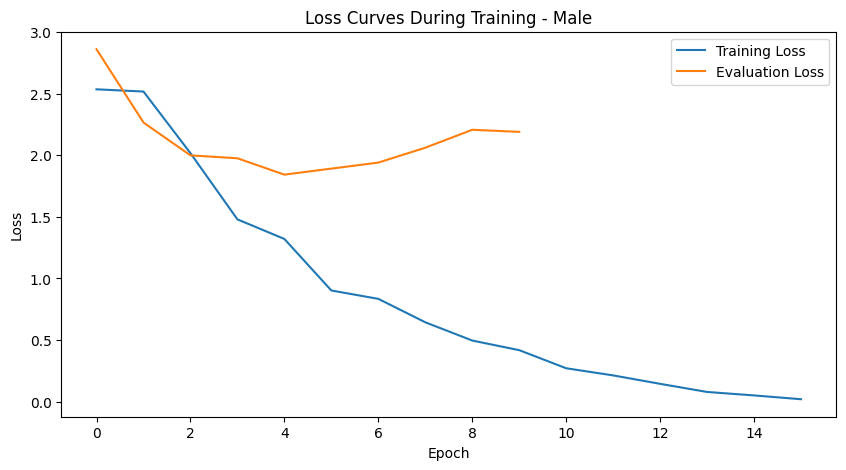

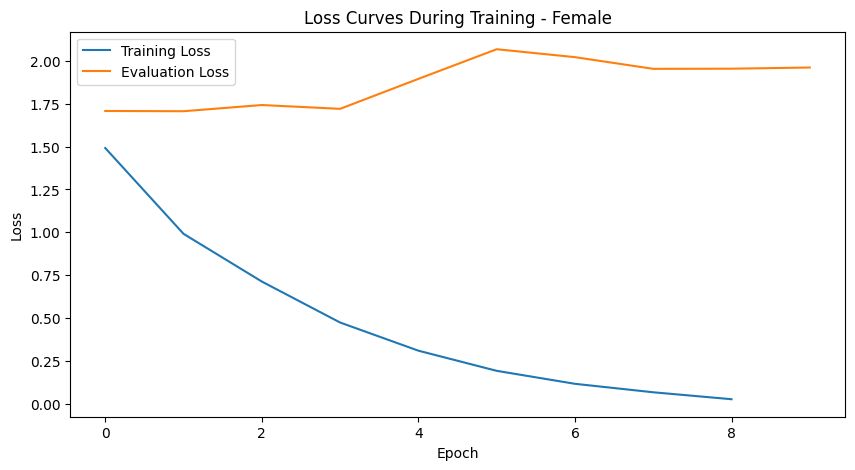

In [23]:
# After training, plot the loss curves for each
def plot_loss_curves(logging_callback, title):
    plt.figure(figsize=(10, 5))
    plt.plot(logging_callback.train_losses, label='Training Loss')
    plt.plot(logging_callback.eval_losses, label='Evaluation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Loss Curves During Training - {title}')
    plt.legend()
    plt.show()

# Now you can plot each set of loss curves separately
plot_loss_curves(logging_callback_male, "Male")
plot_loss_curves(logging_callback_female, "Female")
#plot_loss_curves(logging_callback_combine, "Combined")

In [24]:
import gc
import numpy as np
from tqdm import tqdm
from torch.utils.data import DataLoader
from transformers.models.whisper.english_normalizer import BasicTextNormalizer

# Define evaluation datasets for each gender
eval_dataloader_male = DataLoader(voxpopuli_male["test"], batch_size=8, collate_fn=data_collator)
eval_dataloader_female = DataLoader(voxpopuli_female["test"], batch_size=8, collate_fn=data_collator)
eval_dataloader_mixed = DataLoader(voxpopuli_with_gender["test"], batch_size=8, collate_fn=data_collator)

forced_decoder_ids = processor.get_decoder_prompt_ids(language=language, task=task)
normalizer = BasicTextNormalizer()

# Define lists to store predictions and references for each gender and mixed gender
predictions_male, references_male = [], []
predictions_female, references_female = [], []
predictions_mixed, references_mixed = [], []

model.eval()

# Evaluation for male dataset
for step, batch in enumerate(tqdm(eval_dataloader_male)):
    with torch.cuda.amp.autocast():
        with torch.no_grad():
            generated_tokens = (
                model.generate(
                    input_features=batch["input_features"].to("cuda"),
                    forced_decoder_ids=forced_decoder_ids,
                    max_new_tokens=255,
                )
                .cpu()
                .numpy()
            )
            labels = batch["labels"].cpu().numpy()
            labels = np.where(labels != -100, labels, processor.tokenizer.pad_token_id)
            decoded_preds = processor.tokenizer.batch_decode(generated_tokens, skip_special_tokens=True)
            decoded_labels = processor.tokenizer.batch_decode(labels, skip_special_tokens=True)
            predictions_male.extend(decoded_preds)
            references_male.extend(decoded_labels)
        del generated_tokens, labels, batch
    gc.collect()

# Evaluation for female dataset
for step, batch in enumerate(tqdm(eval_dataloader_female)):
    with torch.cuda.amp.autocast():
        with torch.no_grad():
            generated_tokens = (
                model.generate(
                    input_features=batch["input_features"].to("cuda"),
                    forced_decoder_ids=forced_decoder_ids,
                    max_new_tokens=255,
                )
                .cpu()
                .numpy()
            )
            labels = batch["labels"].cpu().numpy()
            labels = np.where(labels != -100, labels, processor.tokenizer.pad_token_id)
            decoded_preds = processor.tokenizer.batch_decode(generated_tokens, skip_special_tokens=True)
            decoded_labels = processor.tokenizer.batch_decode(labels, skip_special_tokens=True)
            predictions_female.extend(decoded_preds)
            references_female.extend(decoded_labels)
        del generated_tokens, labels, batch
    gc.collect()

# Evaluation for mixed gender dataset
for step, batch in enumerate(tqdm(eval_dataloader_mixed)):
    with torch.cuda.amp.autocast():
        with torch.no_grad():
            generated_tokens = (
                model.generate(
                    input_features=batch["input_features"].to("cuda"),
                    forced_decoder_ids=forced_decoder_ids,
                    max_new_tokens=255,
                )
                .cpu()
                .numpy()
            )
            labels = batch["labels"].cpu().numpy()
            labels = np.where(labels != -100, labels, processor.tokenizer.pad_token_id)
            decoded_preds = processor.tokenizer.batch_decode(generated_tokens, skip_special_tokens=True)
            decoded_labels = processor.tokenizer.batch_decode(labels, skip_special_tokens=True)
            predictions_mixed.extend(decoded_preds)
            references_mixed.extend(decoded_labels)
        del generated_tokens, labels, batch
    gc.collect()

# Compute WER for each gender and mixed gender
wer_male = 100 * metric.compute(predictions=predictions_male, references=references_male)
wer_female = 100 * metric.compute(predictions=predictions_female, references=references_female)
wer_mixed = 100 * metric.compute(predictions=predictions_mixed, references=references_mixed)

print("WER Male:", wer_male)
print("WER Female:", wer_female)
print("WER Mixed Gender:", wer_mixed)

100%|██████████| 39/39 [01:40<00:00,  2.58s/it]

WER Male: 68.18507035535416
WER Female: 58.4070796460177
WER Mixed Gender: 64.76057647605765
